<a href="https://colab.research.google.com/github/MaxtronElNoob/MaxtronElNoob/blob/main/INF280_TallerT3_I_2022_ENUNCIADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller T3 Pirámides Binomiales

<table align='left'>
<tr>
<td><img src='https://bitcoinist.com/wp-content/uploads/2019/12/30-December-1-e1577702026209.jpg' width='850'/> </td>
</tr>
</table>


Imagine que el valor de cierta criptomoneda evoluciona con incrementos diarios independientes de manera que el $i$-ésimo día

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl} 
2\cdot Z_{i} & \mbox{ con probabilidad} \ p\\
1/2 \cdot Z_{i} & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

Si definimos $Y_i=\log_2(Z_{i+1})$, lo anterior es equivalente a escribir

\begin{eqnarray}
Y_{i+1} & = Y_{i} + X_i \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

donde $X_i$ es una v.a. discreta de Rademacher (que toma el valor $1$ con probabilidad $p$ y el valor $-1$ con probabilidad $1-p$).

Suponga que valor actual de la moneda es $Z_0=1$ (de modo que $Y_0=0$).

# Actividades


1.   Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

2.   Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

3.   Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$? 

4.   Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

5.   Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 

6.  Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas. 

7.  Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 


# Integrantes

En esta sección están los nombres, roles y videos de cada integrante:

:

*   Alonso Herrera (202004577-1): https://drive.google.com/file/d/1mare00x7aVoO418r2znLAwIE762EvcEw/view?usp=sharing
*   Nicolás Pizarro (202004682-4): https://youtu.be/EMGGftyN4cc
*   Francisca González (202073626-k): https://drive.google.com/file/d/1d-a2hfasx9t4HtLPIgSpcQh2yiMZOtEy/view?usp=sharing



# Disclaimer

La situación expuesta en este taller no tiene relación oficinal con ninguna criptomoneda y no representa consejo de inversión alguno.

In [ ]:
#librerias
import numpy as np
import math
import matplotlib.pylab as plt

# Pregunta 1: Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

Se pide obtener el valor de $Z_n$ y su correspondiente f.d.p., para lo primero esquematizamos los valores desde el día 0 hasta el día 4 con un árbol de probabilidad, lo que resultó en lo siguiente:

<table align='center'>
<tr>
<td><img src='https://cdn.discordapp.com/attachments/970506189202939964/970506210887471224/unknown.png' width='850'/> </td>
</tr>
</table>


Además, obtuvimos el árbol de probabilidad de $Y_n$

<table align='center'>
<tr>
<td><img src='https://cdn.discordapp.com/attachments/970506189202939964/970506726027722782/unknown.png' width='850'/> </td>
</tr>
</table>

Con estos diagramas pudimos notar distintos patrones. En primer lugar, si expresamos los posibles valores de $Z_n$ en potencia de dos, en un día $n$ los posibles valores que tome son:

\begin{equation}
    Z_n = \{2^n, 2^{n - 2}, 2^{n - 4}, ..., 2^{4 - n}, 2^{2 - n}, 2^{-n}\}
\end{equation}

Debido a que notamos que los exponentes de los posibles valores difieren en 2 en el árbol de probabilidad de $Y_n$ desde $n$ hasta $-n$. Por otro lado, si tratamos de calcular la probabilidad de un posible valor en un día $n$, se obtiene:

\begin{equation}
    P(Z_n) = p^{m}*(1 - p)^{r}
\end{equation}

De esto pudimos notar que al sumar los exponentes se obtiene el número de día y al restarlos se obtiene el exponente del posible valor de $Z_n$ al expresarlo en potencia de dos. Lo anterior se resume en:

\begin{equation}
    m + r = n \qquad (1)\\
    m - r = t \qquad (2)\\
    t = \{n, n - 2, n - 4, ..., 4 - n, 2 - n, -n\}
\end{equation}

Si reescribimos la ecuación (2) como $m = t + r$ y reemplazamos en (1), tenemos que:

\begin{equation}
    2r + t = n \\
    r = \frac{n - t}{2}
\end{equation}

por lo que el valor de $m$ es:

\begin{equation}
    m = \frac{n + t}{2}
\end{equation}

Por ende la probabilidad de $Z_n$ queda expresada de esta manera:

\begin{equation}
    P(Z_n) = p^{\frac{n + t}{2}}*(1 - p)^{\frac{n - t}{2}}
\end{equation}

Sin embargo, al recorrer los árboles de probabilidad, se puede llegar a un mismo valor en un día por distintos caminos que tienen la misma probabilidad, como por ejemplo para obtener 1 en el día 4, existen 6 posibles caminos para llegar a 1 que tienen la probabilidad $p^{2}*(1-p)^{2}$. Si aplicamos esto con cada valor, se obtiene este árbol de probabilidad de la cantidad de caminos:

<table align='center'>
<tr>
<td><img src='https://cdn.discordapp.com/attachments/970506189202939964/970512061719257098/unknown.png' width='850'/> </td>
</tr>
</table>

Este árbol se conoce como "Triángulo de Pascal", cuyos valores pueden expresarse como una combinatoria, que en este caso estarían en términos del número de día ($n$) y el valor del exponente $m$ que encontramos anteriormente ($\frac{n+t}{2}$), el cual toma valores entre 0 y $n$. Por lo tanto, la probabilidad de que $Z_n$ tome un posible valor en un día $n$ es:

\begin{align*}
    f(Z_n = 2^t) = \binom{n}{\frac{n + t}{2}} p^{\frac{n + t}{2}} (1 - p)^{\frac{n - t}{2}} \qquad t = \{n, n - 2, n - 4, ..., 4 - n, 2 - n, -n\}
\end{align*}

Lo cual corresponde a la f.d.p. de $Z_n$.

# Pregunta 2: Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

Primero realizamos una simulación para 10 días con probabilidad de 3/5, la cual se muestra en el siguiente código:

In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 10

#exponentes
resultados={}
y=0
for a in range(simulaciones):
    y=0
    for b in range(dias):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.6:
            y=y+1
        else:
            y=y-1
    if y in resultados:
        resultados[y] = resultados[y] +1
    else:
        resultados[y]=1
resultados = {k: v for k , v in sorted (resultados.items())} #https://www.youtube.com/watch?v=6uih8-Cc7Cg
print(resultados)
print('\n')

#2^al exponente
valores ={}
for a in resultados:
    valor=2**a
    valores[valor]=resultados[a]

print(valores)

{-10: 7, -8: 154, -6: 1062, -4: 4201, -2: 11219, 0: 20003, 2: 25184, 4: 21479, 6: 12024, 8: 4137, 10: 530}


{0.0009765625: 7, 0.00390625: 154, 0.015625: 1062, 0.0625: 4201, 0.25: 11219, 1: 20003, 4: 25184, 16: 21479, 64: 12024, 256: 4137, 1024: 530}


Decidimos añadir un gráfico para analizar la simetría de la distribución. En este caso, se puede observar que la distribución se inclina hacia la derecha, por lo cual no es una distribución simétrica.

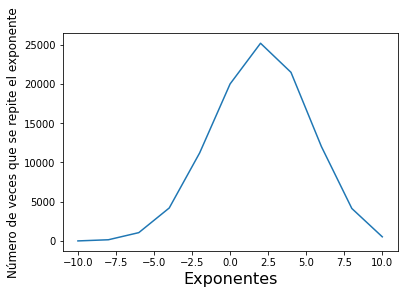

In [ ]:
myList = resultados.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xlabel("Exponentes", size = 16)
plt.ylabel("Número de veces que se repite el exponente", size = 12)
plt.show()

Luego realizamos otra simulación para los 10 días pero con una probabilidad de 1/2.

In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 10

#exponentes
resultados={}
y=0
for a in range(simulaciones):
    y=0
    for b in range(dias):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.5:
            y=y+1
        else:
            y=y-1
    if y in resultados:
        resultados[y] = resultados[y] +1
    else:
        resultados[y]=1
resultados = {k: v for k , v in sorted (resultados.items())} #https://www.youtube.com/watch?v=6uih8-Cc7Cg
print(resultados)
print('\n')

#2^al exponente
valores ={}
for a in resultados:
    valor=2**a
    valores[valor]=resultados[a]

print(valores)

{-10: 94, -8: 994, -6: 4371, -4: 11766, -2: 20641, 0: 24452, 2: 20474, 4: 11749, 6: 4408, 8: 946, 10: 105}


{0.0009765625: 94, 0.00390625: 994, 0.015625: 4371, 0.0625: 11766, 0.25: 20641, 1: 24452, 4: 20474, 16: 11749, 64: 4408, 256: 946, 1024: 105}


Agregamos su gráfico, donde se puede observar que la distribución está centrada, por lo que es simétrica.

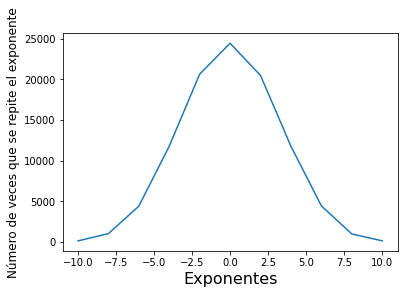

In [ ]:
myList = resultados.items()
myList = sorted(myList) 
x, y = zip(*myList) 
print(zip(*myList))

plt.plot(x, y)
plt.xlabel("Exponentes", size = 16)
plt.ylabel("Número de veces que se repite el exponente", size = 12)
plt.show()

# Pregunta 3: Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$? 

In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 30
import numpy as np
#exponentes
resul_dia=[]
resultados_1=[]
y=0
for a in range(dias):
    y=0
    for b in range(simulaciones):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.6:
            y=y+1
        else:
            y=y-1
        aux = 2**y
        resul_dia.append(aux)
    print(resul_dia)

# Pregunta 4: Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?


In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 30

def valor_esperado(dic):
    sum=0
    for valor in dic.keys():
        sum += valor*(dic[valor]/simulaciones)
    return sum
  
def promedio_ponderado(dic):
    sum=0
    for valor in dic.keys():
        sum += dic[valor]*valor
    return (sum/simulaciones)

def var(dic):
    prom = promedio_ponderado(dic)
    sum=0
    for valor in dic.keys():
        sum += (dic[valor] - prom)**2
    return (sum/simulaciones)

#exponentes
resultados={}
y=0
for a in range(simulaciones):
    y=0
    for b in range(dias+1):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.6:
            y=y+1
        else:
            y=y-1
    if y in resultados:
        resultados[y] = resultados[y] +1
    else:
        resultados[y]=1
resultados = {k: v for k , v in sorted (resultados.items())} #https://www.youtube.com/watch?v=6uih8-Cc7Cg

#2^al exponente
valores ={}
for a in resultados:
    valor=2**a
    valores[valor]=resultados[a]

#exponentes
resul_dia=[]
resultados_1=[]
y=0
for a in range(dias):
    y=0
    for b in range(simulaciones):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.6:
            y=y+1
        else:
            y=y-1
        aux = 2**y
        resul_dia.append(aux)

print(var(valores))
print(valor_esperado(valores))

# Pregunta 5: Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 

Primero calculamos la probabilidad de pérdida basándonos en que la pérdida se cumplirá siempre y cuando el valor de la criptomoneda sea menor al valor del impuesto en el día 30.





In [ ]:
def binomial(x, n, p):
    factoriales=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))
    probabilidades=p**x * (1-p)**(n-x)
    return factoriales*probabilidades

def fdp_binomial(n,p):
    resultado={}
    for x in range(-(n),n+1,2):
        resultado[2**x] = binomial(int((x+n)/2),n,p)
    return resultado
valores = fdp_binomial(30,3/5)
print(valores)

perdidas = 0
for valor in valores.keys():
    if valor < 1.35**30:
        perdidas += valores[valor]
print("Probabilidad teórica (en porcentaje): "+str(round(perdidas*100,2))+"%")

{9.313225746154785e-10: 1.1529215046068489e-12, 3.725290298461914e-09: 5.1881467707308196e-11, 1.4901161193847656e-08: 1.1284219226339532e-09, 5.960464477539063e-08: 1.579790691687534e-08, 2.384185791015625e-07: 1.5995380753336285e-07, 9.5367431640625e-07: 1.24763969876023e-06, 3.814697265625e-06: 7.797748117251436e-06, 1.52587890625e-05: 4.0102704603007386e-05, 6.103515625e-05: 0.00017294291360046932, 0.000244140625: 0.0006341240165350542, 0.0009765625: 0.00199749065208542, 0.00390625: 0.005447701778414782, 0.015625: 0.012938291723735108, 0.0625: 0.026871836656988297, 0.25: 0.0489451310538001, 1: 0.07831220968608017, 4: 0.11012654487105022, 16: 0.13603867307600317, 64: 0.1473752291656701, 256: 0.13961863815695064, 1024: 0.11518537647948426, 4096: 0.08227526891391732, 16384: 0.05048709683354017, 65536: 0.02634109400010791, 262144: 0.01152422862504721, 1048576: 0.004148722305016995, 4194304: 0.0011967468187549023, 16777216: 0.0002659437375010894, 67108864: 4.2740957812675074e-05, 268435

Luego realizamos una simulación para obtener la probabilidad anterior junto el valor esperado de la utilidad neta.

In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 30

#exponentes
resultados={}
y=0
for a in range(simulaciones):
    y=0
    for b in range(dias):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.6:
            y=y+1
        else:
            y=y-1
    if y in resultados:
        resultados[y] = resultados[y] +1
    else:
        resultados[y]=1
resultados = {k: v for k , v in sorted (resultados.items())} #https://www.youtube.com/watch?v=6uih8-Cc7Cg

print(resultados)
print('\n')
#2^al exponente
valores ={}
for a in resultados.keys():
    valor = (2**a) - (1.35**dias)
    valores[valor] = resultados[a]

print(valores)
print('\n')

perdidas = 0
for valor in valores.keys():
    if valor < 0:
        perdidas += valores[valor]
print("Probabilidad (en porcentaje): "+str(round(perdidas/simulaciones*100,2))+"%")

def valor_esperado(dic):
    sum=0
    for valor in dic.keys():
        sum += (valor)*(dic[valor]/simulaciones)
    return sum

print("Valor esperado de la utilidad neta:", round(valor_esperado(valores),2))

{-16: 1, -14: 14, -12: 65, -10: 214, -8: 511, -6: 1333, -4: 2639, -2: 4944, 0: 7781, 2: 11068, 4: 13608, 6: 14929, 8: 13810, 10: 11513, 12: 8140, 14: 5101, 16: 2599, 18: 1151, 20: 410, 22: 140, 24: 26, 26: 3}


{-8128.5494861227735: 1, -8128.549440346406: 14, -8128.549257240938: 65, -8128.548524819063: 214, -8128.545595131563: 511, -8128.533876381563: 1333, -8128.487001381563: 2639, -8128.299501381563: 4944, -8127.549501381563: 7781, -8124.549501381563: 11068, -8112.549501381563: 13608, -8064.549501381563: 14929, -7872.549501381563: 13810, -7104.549501381563: 11513, -4032.5495013815625: 8140, 8255.450498618437: 5101, 57407.45049861844: 2599, 254015.45049861845: 1151, 1040447.4504986184: 410, 4186175.4504986187: 140, 16769087.450498618: 26, 67100735.45049862: 3}


Probabilidad (en porcentaje): 90.57%
Valor esperado de la utilidad neta: 14473.21


Se puede apreciar que tanto en la teoría como en la simulación, la probabilidad de pérdida es 90,6% aproximadamente, una probabilidad bastante grande que implica que es muchísimo más probable perder dinero al vender la criptomoneda luego del primer mes.

Por lo tanto, decidimos que no es conveniente vender la criptomoneda luego del primer mes, aunque el valor esperado de la utilidad neta sea mayor al valor del impuesto. Esto se puede explicar debido a la cantidad inmensa de posibles valores que puede tomar la criptomoneda en el día 30, siendo $2^{30}$ valores, esto provoca una grande diferencia entre los valores máximos de la criptomoneda y los valores menores al valor del impuesto, que corresponden al 90,6% de los valores, mientras el porcentaje restante corresponde a los valores mayores al impuesto. En otras palabras, la distribución no es simétrica y está inclinada hacia la izquierda.

# Pregunta 6: Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas. 

Para averiguar la probabilidad en esta pregunta, decidimos utilizar una simulación que, basada en la ley de los grandes números, nos entregará un valor muy cercano a lo que sería su valor teórico.

In [ ]:
#Variables iniciales
simulaciones= 10**5
dias = 14

#simulacion
resultado=0
for a in range(simulaciones):
    count=0
    for b in range(dias):
        cambio= np.random.uniform(0,1)
        if cambio <= 0.5:
            count+=1
        else:
            count=0
    if 5 <= count:
        resultado+=1

print("Probabilidad de 5 o más alzas consecutivas en dos semanas: "+str(round((resultado/simulaciones)*100,2))+"%")

Probabilidad de 5 o más alzas consecutivas en dos semanas: 3.06%


La probabilidad de obtener 5 o más alzas consecutivas según la simulación es de 3% aproximadamente, una probabilidad bastante baja que implica que hiciste una baja probabilidad de conseguir 5 o más alzas consecutivas.

# Pregunta 7: Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 

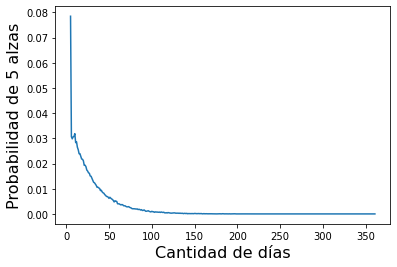

In [ ]:
#Variables iniciales
simulaciones= 10**5

#exponentes
resultados={}
dias={}
for a in range(simulaciones):
    count = 0
    y=0
    dia=0
    while 5 > count:
        dia+=1
        if np.random.uniform(0,1) <= 0.6:
            count+=1
            y+=1
        else:
            count = 0
            y-=1
    precio= (2**y) - (1.35**dia)
    if dia in dias:
        dias[dia] = dias[dia] +1
    else:
        dias[dia]=1
    if precio in resultados:
        resultados[precio] = resultados[precio] +1
    else:
        resultados[precio]=1

for dia in dias.keys():
    dias[dia]=dias[dia]/simulaciones

def valor_esperado(dic):
    sum=0
    for valor in dic.keys():
        sum += valor*(dic[valor]/simulaciones)
    return sum

myList = dias.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.plot(x, y)
plt.xlabel("Cantidad de días", size = 16)
plt.ylabel("Probabilidad de 5 alzas", size = 16)
plt.show()